first we read the data set and print the information of the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_set = pd.read_csv("heart.csv")

print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


here we analysis the dataset

(303, 14)
#################################################################################################### isNull
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
#################################################################################################### Describe
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000

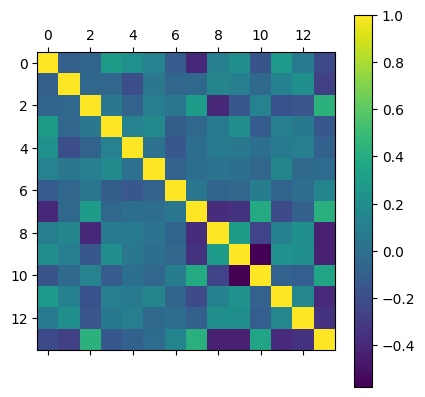

In [ ]:
# prompt: exploratory data analysis for the data set

# check the shape of the dataset
print(data_set.shape)

print("#################################################################################################### isNull")

# check the number of missing values
print(data_set.isnull().sum())

print("#################################################################################################### Describe")

# check the distribution of numerical variables
print(data_set.describe())

print("#################################################################################################### groupby")

# check the distribution of categorical variables
print(data_set.groupby('output').size())

print("#################################################################################################### correlation")

# create a correlation matrix
corr = data_set.corr()
#print(corr)

print("####################################################################################################")

# plot the correlation matrix
plt.matshow(corr)
plt.colorbar()
plt.show()


analysis the dataset by visualizations

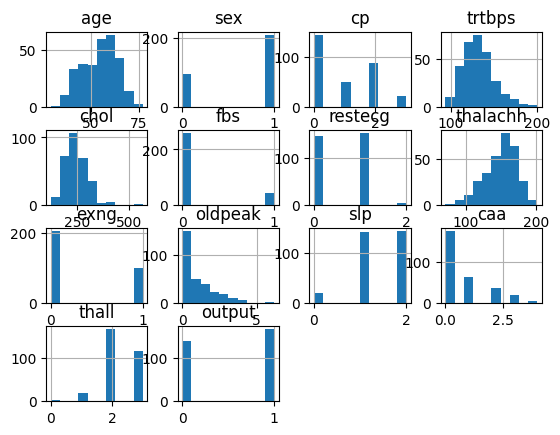

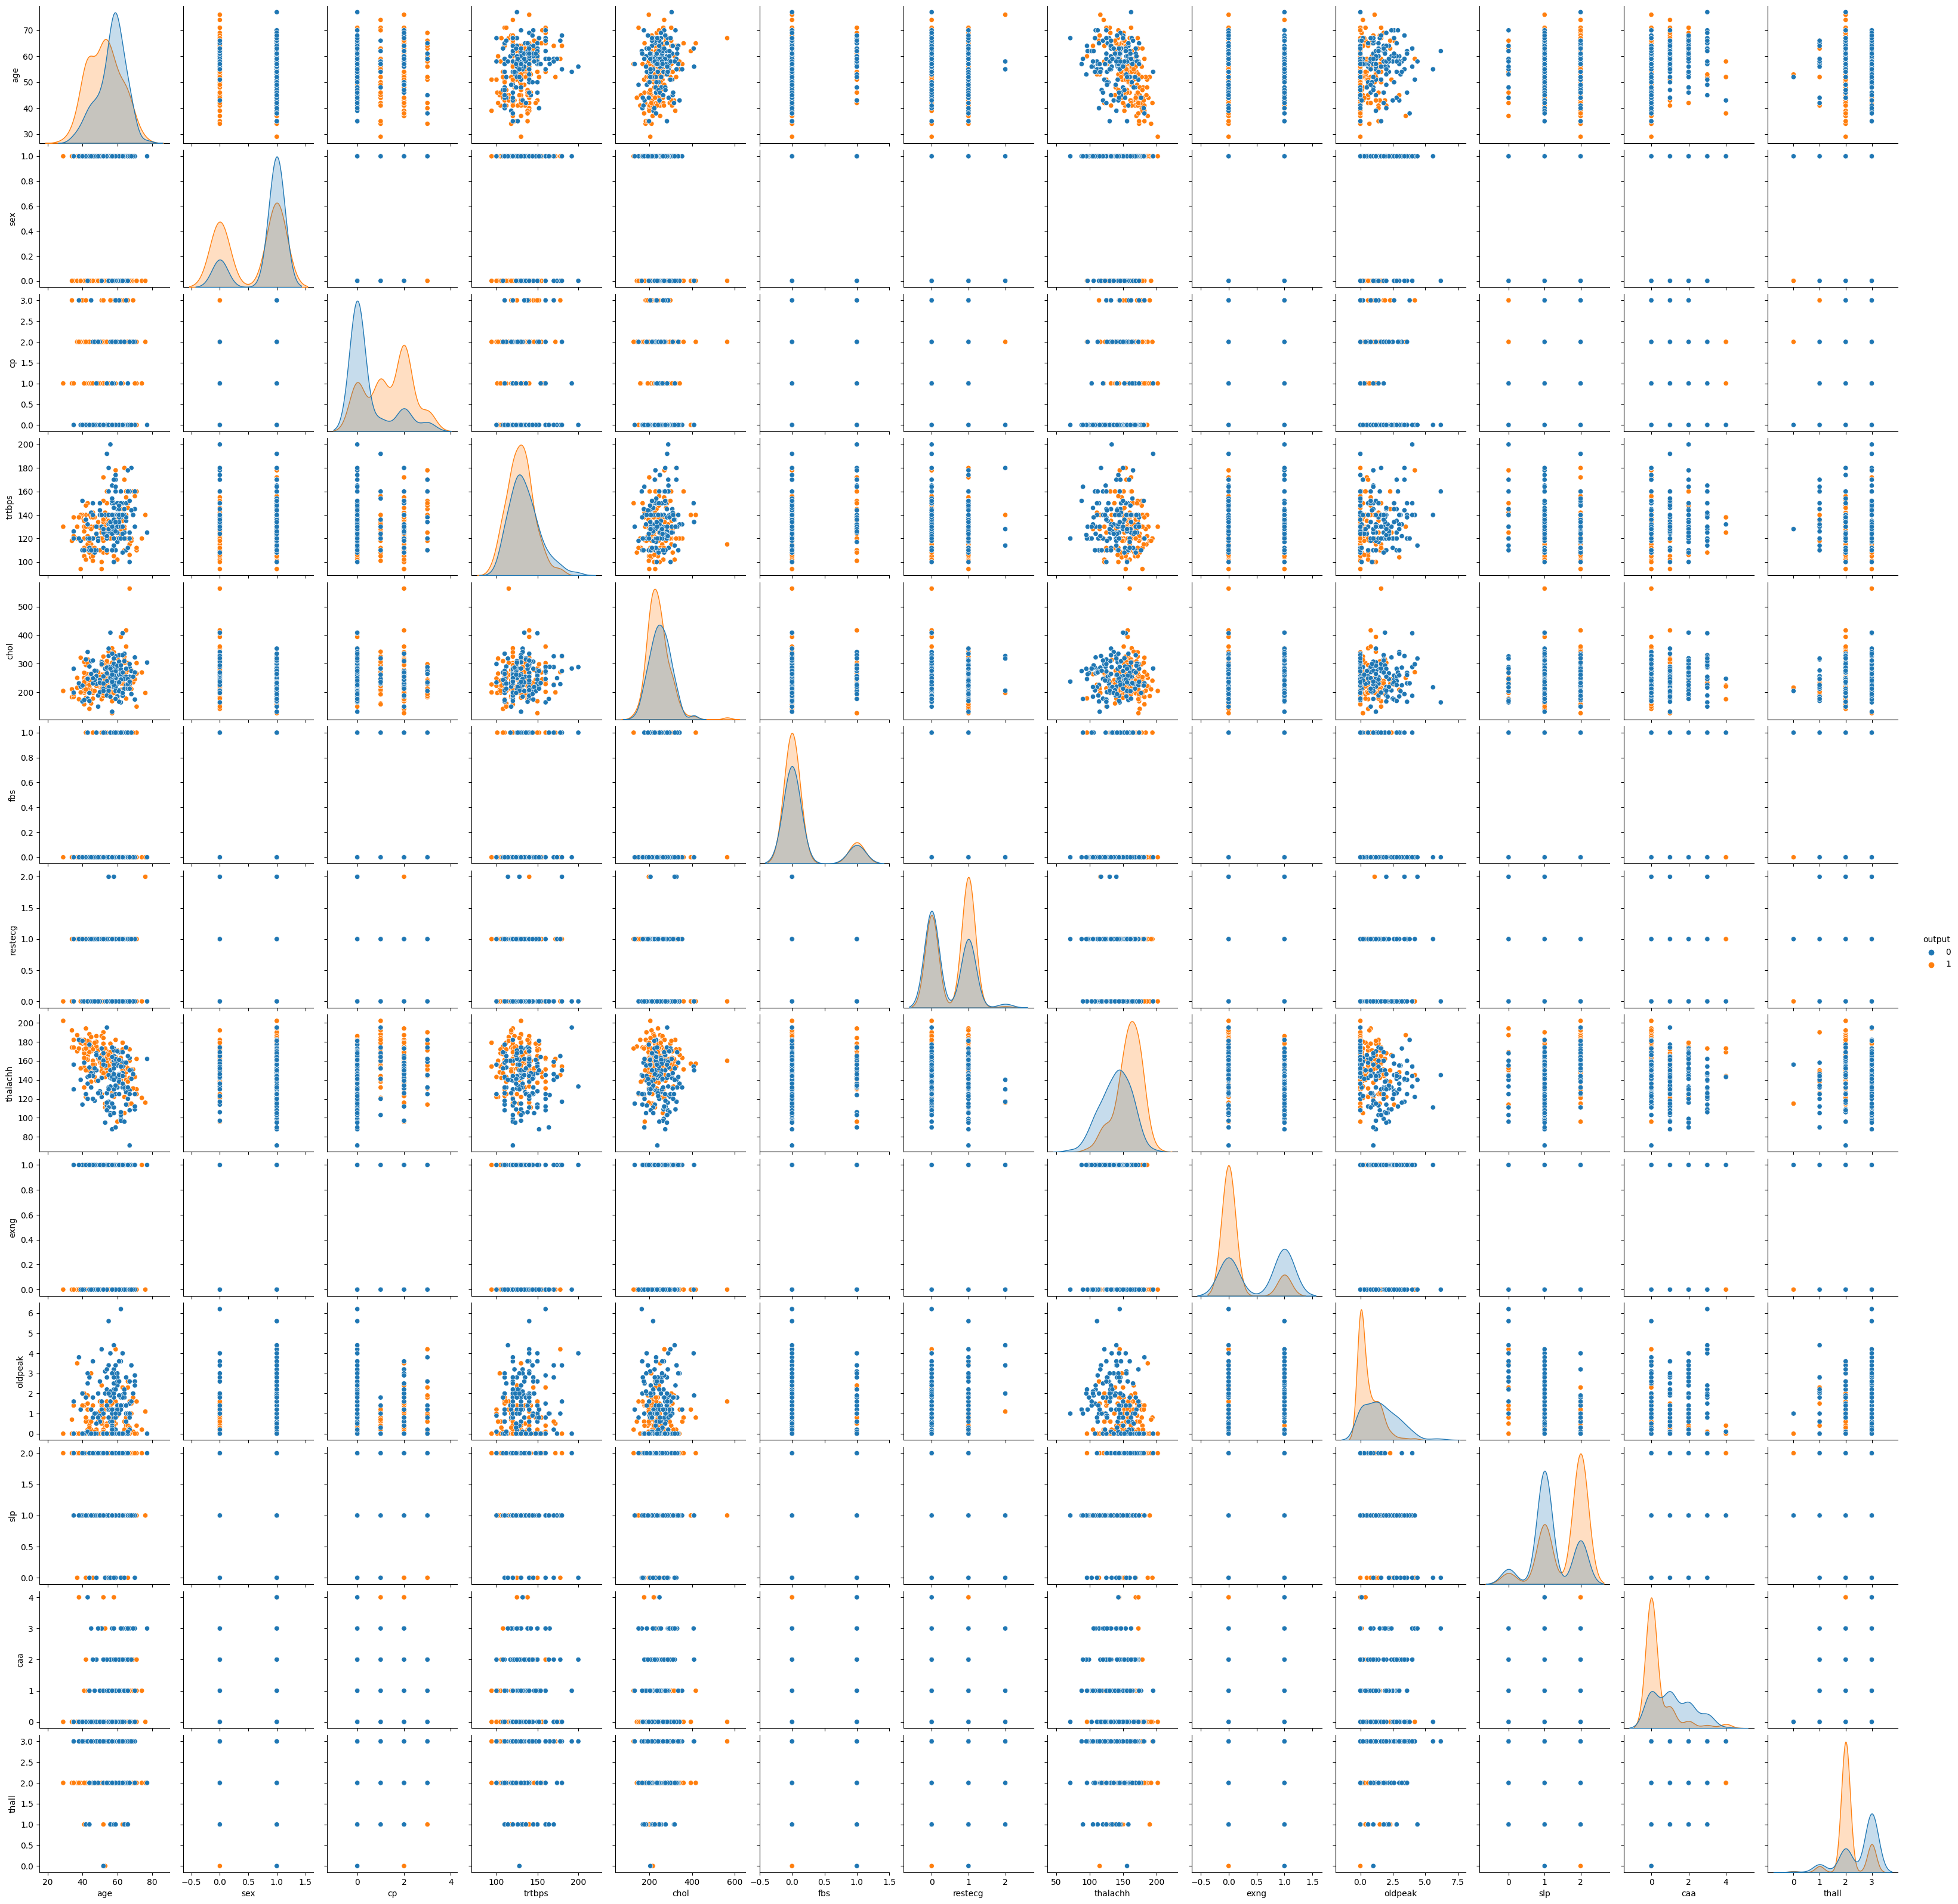

In [ ]:
# prompt: Using dataframe data_set: exploratory data analysis but visualizations

import matplotlib.pyplot as plt
import seaborn as sns

data_set.hist()
plt.show()

sns.pairplot(data_set, hue='output')
plt.show()


nearest neighbor when K = 3

Accuracy: 0.7105263157894737
Precision: 0.6862745098039216
Recall: 0.8536585365853658
F1-score: 0.7608695652173912
AUC: 0.6982578397212543

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.54      0.63        35
           1       0.69      0.85      0.76        41

    accuracy                           0.71        76
   macro avg       0.72      0.70      0.70        76
weighted avg       0.72      0.71      0.70        76



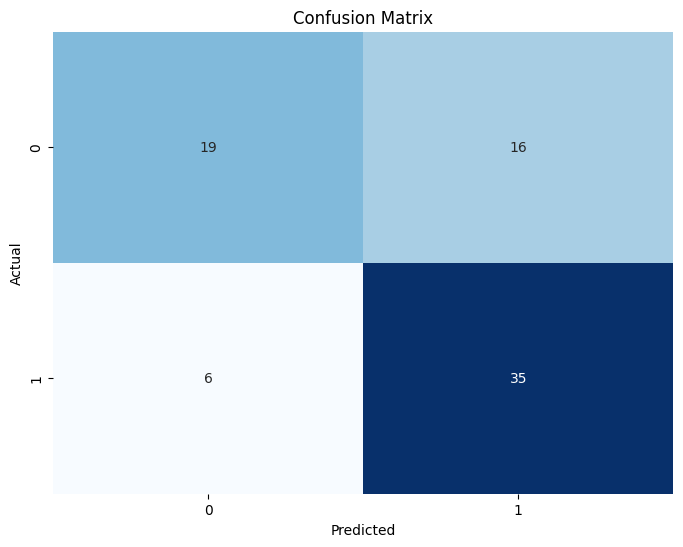

In [4]:
# prompt:  nearest neighbor baseline using a random distance k=3 and evaluate all metrics (accuracy, precision, recall, F1-score, ROC-AUC) and draw ROC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix, classification_report
import seaborn as sns

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_set.drop('output', axis=1), data_set['output'], test_size=0.25,random_state=499)

# create the k-NN model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# train the model
knn.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)
print("\nClassification Report:")
print(classification_rep)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


nearest neighbor when K = 1

Accuracy: 0.6710526315789473
Precision: 0.6739130434782609
Recall: 0.7560975609756098
F1-score: 0.7126436781609194
AUC: 0.6637630662020906

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        35
           1       0.67      0.76      0.71        41

    accuracy                           0.67        76
   macro avg       0.67      0.66      0.66        76
weighted avg       0.67      0.67      0.67        76



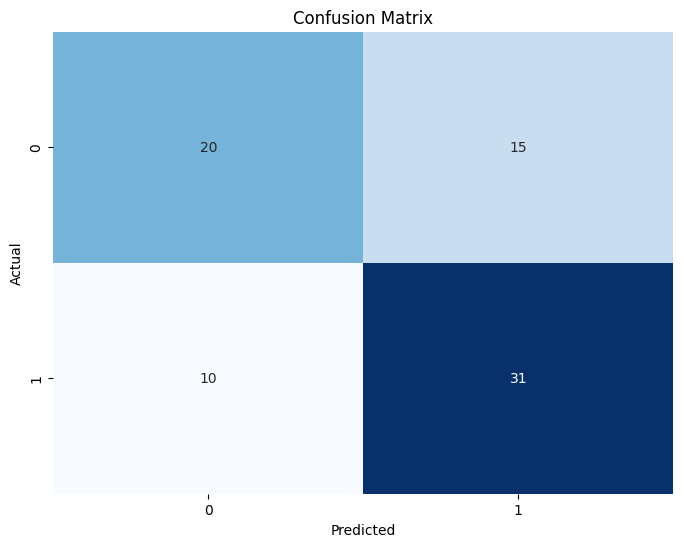

In [ ]:
# prompt:  nearest neighbor baseline using a random distance k=1 and evaluate all metrics (accuracy, precision, recall, F1-score, ROC-AUC) and draw ROC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix, classification_report

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_set.drop('output', axis=1), data_set['output'], test_size=0.25,random_state=499)

# create the k-NN model
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# train the model
knn.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)
print("\nClassification Report:")
print(classification_rep)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

Accuracy: 0.8289473684210527
Precision: 0.8333333333333334
Recall: 0.8536585365853658
F1-score: 0.8433734939759037
AUC: 0.8268292682926829

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



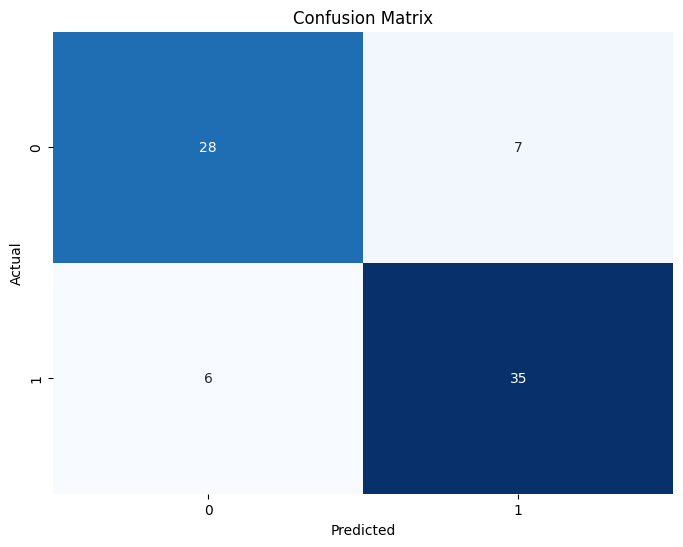

In [ ]:
# prompt: Decision Tree and evaluate all metrics (accuracy, precision, recall, F1-score, ROC-AUC)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_set.drop('output', axis=1), data_set['output'], test_size=0.25,random_state=499)

# create the decision tree model
dt = DecisionTreeClassifier()

# train the model
dt.fit(X_train, y_train)

# make predictions on the test set
y_pred = dt.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)
print("\nClassification Report:")
print(classification_rep)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


AdaBoost hyper-parameters selection

In [5]:
# prompt: AdaBoost and evaluate all metrics (accuracy, precision, recall, F1-score, ROC-AUC)
from sklearn.ensemble import AdaBoostClassifier
# split the data into train and test sets
ac = []
lrate = [10,1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]

for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(data_set.drop('output', axis=1), data_set['output'], test_size=0.25, random_state=499)

# create the AdaBoost model
  ada = AdaBoostClassifier(n_estimators=10 + i*3)

# train the model
  ada.fit(X_train, y_train)

# make predictions on the test set
  y_pred = ada.predict(X_test)

# evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  ac.append(accuracy)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)

# print the metrics
  print("Accuracy:", accuracy, " Precision:", precision, " Recall:", recall, " F1-score:", f1, " AUC:", auc)
  print("i= ", i)
  print("##########################################")


maxin = ac.index(max(ac))
print("ind: ", maxin)
print("max: ", max(ac))



Accuracy: 0.881578947368421  Precision: 0.8809523809523809  Recall: 0.9024390243902439  F1-score: 0.8915662650602411  AUC: 0.8797909407665506
i=  0
##########################################
Accuracy: 0.8947368421052632  Precision: 0.8837209302325582  Recall: 0.926829268292683  F1-score: 0.9047619047619047  AUC: 0.89198606271777
i=  1
##########################################
Accuracy: 0.9210526315789473  Precision: 0.9069767441860465  Recall: 0.9512195121951219  F1-score: 0.9285714285714286  AUC: 0.9184668989547037
i=  2
##########################################
Accuracy: 0.8947368421052632  Precision: 0.8837209302325582  Recall: 0.926829268292683  F1-score: 0.9047619047619047  AUC: 0.89198606271777
i=  3
##########################################
Accuracy: 0.9078947368421053  Precision: 0.9047619047619048  Recall: 0.926829268292683  F1-score: 0.9156626506024096  AUC: 0.9062717770034843
i=  4
##########################################
Accuracy: 0.881578947368421  Precision: 0.880952

AdaBoost

Accuracy: 0.9342105263157895
Precision: 0.9285714285714286
Recall: 0.9512195121951219
F1-score: 0.9397590361445782
AUC: 0.9327526132404181

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.93      0.95      0.94        41

    accuracy                           0.93        76
   macro avg       0.93      0.93      0.93        76
weighted avg       0.93      0.93      0.93        76



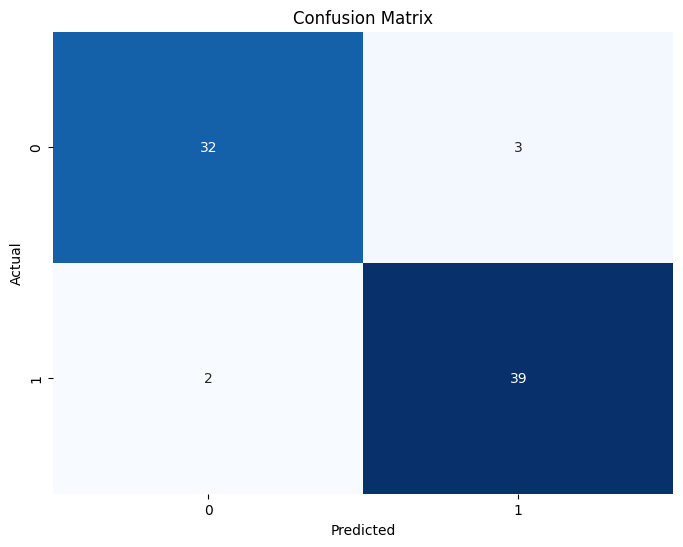

In [ ]:
# prompt: AdaBoost and evaluate all metrics (accuracy, precision, recall, F1-score, ROC-AUC)
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(data_set.drop('output', axis=1), data_set['output'], test_size=0.25, random_state=499)

# create the AdaBoost model
ada = AdaBoostClassifier(n_estimators=40)

# train the model
ada.fit(X_train, y_train)

# make predictions on the test set
y_pred = ada.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)
print("\nClassification Report:")
print(classification_rep)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

